# **Data-Driven Analysis of Hacken Lee's Setlist for **

## 1. 引言

### 1.1 项目目标
分析李克勤三场同主题歌单的选曲。

具体而言，此项目将探讨：
- *歌单中热门金曲与沧海遗珠的平衡程度* 
- *在这次主题巡回中， 哪张专辑是李生心头好*
- *粤港澳三地的歌单有何异同*

*沧海遗珠\*: 冷门经典/不被大众熟知但粉丝喜欢的曲目
### 1.2 为什么选李克勤作为分析对象？
首先，我喜欢他。

其次，李克勤是粤语流行乐坛的代表性歌手，拥有丰富的音乐作品：他是少数从1980年代到2020年代持续活跃且保持人气与专辑稳定产出的歌手，更是罕见的在1980年代至2010年代均获得香港乐坛颁奖礼奖项的歌手。

对于李生这样作品众多的成熟歌手而言，演唱会选曲往往需要在热门金曲与沧海遗珠之间取得平衡。这一特点是他的演唱会曲目编排尤其值得分析。

### 1.3 为什么选粤港澳这三场?
在2023年五月，李克勤再度携手香港管弦乐团，在香港红磡体育馆举办「弦續 李克勤·港樂演唱會」个人演唱会。随后于2024年，他与广州交响乐团合作，将「弦續」这一演唱会主题带到中国内地进行巡演。今年初（2025年），他第三度联袂澳门乐团，在澳门呈献了这场广受好评的演唱会。

虽然三地在名称上有些许差别——在香港是**弦續 李克勤·港樂演唱會**，在内地是**弦续 李克勤巡回演唱会**，在澳门是**李克勤·我們的交響樂**——但是主题与演出方式是保持一致的:
- 主题*弦续* ——粤语音同*延续*，意为音乐的延续
- 与各地乐团（港乐、广交、澳门乐团）的合作演出

歌单分别选自:
- **2023/05/20 香港场** （数据来源：*HackenZone* @FB）
- **2024/11/30 广州场** （一手资料）
- **2025/02/09 澳门场** （同一手）

这三场分别代表了23年香港、24年内地巡回、及23年到25年澳门这三地的收官场次。*(其实澳门场并不是最终的收官因为李生会于今年晚些时候返场——但在做这个项目时我认定是尾场)*

演唱会中的安可环节对于塑造持久印象尤为关键。而收官场次又通常拥有最热烈的氛围，歌手也往往会在安可环节加唱更多曲目。例如，李克勤在2017年《李克勤庆祝成立30周年演唱会》尾场时，安可曲目高达14首。

基于粤港澳大湾区文化同源的特殊性，本项目选取香港、广州、澳门三地演唱会作为样本更具典型意义。三地不仅共享粤语这一日常主流语言，更在流行文化审美上具有高度共识。李克勤兼具国语和粤语专辑，在非粤语区通常会考虑观众从而替换部分曲目(例如这次巡回将《蓝月亮》改为《爱可以问谁》)。这种文化-语言的双重同质性，能最大排除干扰，使分析更精准聚焦于歌单设计。

## 2. 从Spotify获取数据
### 2.1 搭建环境与授权认证
[Spotipy](https://spotipy.readthedocs.io/en/2.25.1/)是一个通过用Spotify Web API，从Spotify平台获取歌曲数据的Python库。对于授权认证，我按照*Spotipy*文档页上的步骤并设置环境变量。

In [ ]:
import pandas as pd
import spotipy
import time
import requests
from spotipy.oauth2 import SpotifyClientCredentials

spo = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
path = "dataset/"

### 2.2 获取完整专辑数据
首先通过`artist_albums()`方法，根据指定艺人`id`抓取其全部专辑列表。

**注意事项**:
1. 参数`include_groups`包含四个有效值:
    - `album` （正式专辑）
    - `single` （单曲）
    - `appears_on` (参与作品)
    - `compilation` （精选集） 
    
    本项目无需获取`appers_on`类型数据，因该类型多为Spotify自制合辑，而非唱片公司官方发行的作品。
2. 该方法单次请求最多返回**50条**数据。若艺人专辑超过50张，需通过while循环实现分页获取。

最后使用`pandas`库将结果转换为DataFrame对象，剔除冗余列后保存文件至本地。


In [ ]:
albums = []
hacken = spo.artist("https://open.spotify.com/artist/3PV11RNUoGfX9tMN2wVljB")

album = spo.artist_albums(hacken['id'], include_groups='album',limit=50)
single = spo.artist_albums(hacken['id'], include_groups='single',limit=50)
compilation = spo.artist_albums(hacken['id'], include_groups='compilation',limit=50)
albums.extend(album['items'])
albums.extend(single['items'])
albums.extend(compilation['items'])

while album['next']:
    album = spo.next(album)
    albums.extend(album['items'])
while single['next']:
    single = spo.next(single)
    albums.extend(single['items'])
while compilation['next']:
    compilation = spo.next(compilation)
    albums.extend(compilation['items'])

df = pd.DataFrame(data=albums,columns=['name','id','release_date','album_type'])
df.to_excel(path+"Hacken_Lee_Albums_Full.xlsx",index=False)

这将生成一个包含**4个**字段的完整专辑数据集：
- `name` （专辑名称）
- `id` （专辑的Spotify ID）
- `release_date` （发行日期）
- `album_type`  （专辑类型）

![](img/ex0.png)

In [ ]:
ex_overall = pd.read_excel(path+"Hacken_Lee_Albums_Full.xlsx")
ex_overall.head()

### 2.3 获取每张专辑的曲目数据
针对每张专辑，使用`album_tracks()`方法获取专辑内所有曲目的信息。我们仅需提取每首曲目的`id`和`name`字段用于后续分析，同样使用`pandas`库进行数据处理。

**注意事项**：在此步骤中必须加入`time.sleep()`延时操作，否则极易因请求频率过高导致进程中断。

In [ ]:
for i in range(len(albums['id'])):
    print(albums['name'][i]," started")
   
    results = spo.album_tracks(albums['id'][i])
    tracks = results['items']
    while results['next']:
        results = spo.next(results)
        tracks.extend(results['items'])
        
    tracks_df = pd.DataFrame(data=tracks,columns=['name','id'])
    print(albums['name'][i]," dataframe generated")
    tracks_df["album_id"] = albums['id'][i]
    tracks_df.to_excel(path+str(albums['name'][i])+".xlsx",index=False)
    print(str(albums['name'][i])," finished")
    time.sleep(30) 

至此，每张专辑均生成独立数据集，包含**3个**字段：
- `name` （曲目名称）
- `id` （曲目唯一标识）
- `album_id` （所属专辑id）

行数即为该专辑的曲目总量。示例如下：
![](img/ex1.png)

In [ ]:
ex_album = pd.read_excel(path+"李克勤慶祝成立30週年演唱會.xlsx")
ex_album.head()

### 2.4 获取每首曲目的音频特征
这是数据提取环节核心的一步。Spotify数据库最具价值的部分在于每首曲目的音频特征数据。`audio_features()`方法支持传入曲目`id`列表作为参数，这一设计显著优化了提取效率——通过批量获取音频特征（而非逐条查询），既能减少API调用次数，又可避免超时中断。

继续使用`pandas`进行数据处理：剔除冗余列后保存结果文件。

**注意事项**：
1. 需谨慎设置`time.sleep()`参数值，建议根据API限制动态调整间隔时长
2. `audio_features` 返回的数据不包含专辑/曲目名称，需手动关联
    - `features_df['album_name'] = albums['name'][i]` *从总专辑数据集复制当前专辑名称（按索引定位）* 
    - `features_df.loc[:,'track_name'] = album['name']` *从当前数据集复制全部曲目名称* 

In [ ]:
for i in range(len(albums['id'])):
 
    if (i>20 and i%20==0):
        time.sleep(5)
    print(albums['name'][i]+" started")
   
    album = pd.read_excel(path+albums['name'][i]+'.xlsx') 
 
    track_ids = []
    for j in range(len(album['id'])):
        track_ids.append(album['id'][j])
    time.sleep(1)
    print("Track ID concatenated")
    results = spo.audio_features(track_ids)
    
    features_df = pd.DataFrame(data=results,columns=results[0].keys())
    print("DataFrame Generated")
    time.sleep(1)
    features_df = features_df.drop(columns=['type','uri','track_href','analysis_url'])
 
    features_df['album_name'] = albums['name'][i]
    features_df.loc[:,'track_name'] = album['name']
    features_df.to_excel(path+albums['name'][i]+'_features.xlsx',index=False)
    
    print(albums['name'][i]+" finished")
    print('time to sleep')
    time.sleep(25)

与上一步(2.3)类似，这将为每张专辑独立生成一个包含**14个**字段的数据集。示例如下：
![](img/ex2.png)

In [ ]:
ex_album_feature = pd.read_excel(path+"李克勤慶祝成立30週年演唱會_features.xlsx")
ex_album_feature.head()

### 2.5 合并特征数据集为统一数据集
为了便于快速检索和提取特定曲目信息，将所有特征数据集合并为一个总数居集将大幅提升效率。 

**注意事项**：
为了提高可读性，通过一下代码调整列顺序，确保`track_name`(曲目名称) `id`(曲目ID) `album_name`(专辑名称) 作为前三列显示：

```python
album = album.iloc[:, [15, 11, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13]] 
```

In [ ]:
album_features = []
total_albums_features = []  
for i in range(len(albums['id'])):
    album = pd.read_excel(path + albums['name'][i] + '_features.xlsx')
    album = album.iloc[:, [15, 11, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13]] 
    albums.append(album)

album_features_total = pd.concat(total_albums_features)
album_features_total.head()

### 2.6 通过公共API获取播放量数据
**免责声明**: 本项目仅用于**教育研究目的**。

回到本项目的首个问题：*歌单中热门金曲与沧海遗珠的平衡程度*。要解答这个问题，首先需要明确定义何为*热门金曲*，何为*沧海遗珠*。每位歌迷可能有不同见解，因此必须引入客观量化标准。

#### 2.6.1 Spotify流行度(`popularity`)数据的局限性
Spotify API虽有提供曲目流行度数据（*“根据算法计算，主要基于总播放量及近期播放频率”*），但其机制导致同一曲目的不同版本会独立计算流行度，这在本项目中会产生偏差：
- 合集专辑干扰：唱片公司常发行精选合辑，导致同一首歌的播放量分散在不同专辑版本中
- 数据碎片化：听众可能通过精选辑播放经典曲目，而非原始专辑版本
#### 2.6.2 采用公开API获取播放总量数据
Spotify的APP/网页上也会显示曲目的播放量，尽管官方API未开放此数据。经过一番调查发现，Spotify实际会汇总同一曲目所有版本的播放量——这完美契合本项目需求。

诚挚感谢[此github项目](https://github.com/entriphy/sp-playcount-librespot)的作者提供的可获取专辑内所有曲目的播放量的API。

使用`requests`库处理API响应，以及通过`pandas`将播放量与现有特征数据集合并。


In [ ]:
hacken_albums = pd.read_excel(path+"Hacken_Lee_Albums_Full.xlsx")

base_url = "https://api.t4ils.dev/albumPlayCount"
for i in range(len(hacken_albums['id'])):
    if (i>61 and i%10==0):
        print("it's time to sleep")
        time.sleep(5)
    album_id = hacken_albums['id'][i]  

  
    url = f"{base_url}?albumid={album_id}"
    response = requests.get(url)
    print(hacken_albums['name'][i]," started")

    if response.status_code == 200:
        data = response.json()
    
        if data.get('success'):
            play_count_data = []
            album_data = data.get('data',{})
            for disc in album_data.get('discs', []):
                for track in disc.get('tracks', []):
                    track_id = track.get('uri').split(":")[-1] 
                    play_count = track.get('playcount')
                    play_count_data.append({'id': track_id, 'play_count': play_count})
            
         
            play_count_df = pd.DataFrame(play_count_data)
            print(play_count_df.head())
          
            existing_data = pd.read_excel(path+hacken_albums['name'][i]+"_features.xlsx")
            updated_data = existing_data.merge(play_count_df, on='id', how='left')
        
            updated_data.to_excel(path+hacken_albums['name'][i]+"_features.xlsx", index=False)
            print("Play count data successfully merged into the Excel sheet.")
        
        else:
            print("API response indicates failure.")
    else:
        print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")
    time.sleep(2)

#### 2.6.3 更新特征数据总集
在获取完每张专辑的播放量数据后，需要更新特征数据总集。

**注意事项**：
在特征数据总集里，专辑排列的顺序跟在专辑数据总集保持一致。通过利用这一特点，嵌套for循环即可简化更新流程。

In [ ]:
playcount_list = []

for i in range(len(hacken_albums['id'])):
    album_name = hacken_albums.loc[i, "name"]
    print(f"{album_name} started")

    album = pd.read_excel(path + album_name + "_features.xlsx")
  
    for j in range(len(album['id'])):
        playcount_list.append(album.loc[j, 'play_count'])

hacken_features = pd.read_excel(path + "Hacken_Lee_Albums_Features_Full.xlsx")
hacken_features['play_count'] = playcount_list

hacken_features.to_excel(path+"Hacken_Lee_Albums_Features_Updated.xlsx",index=False)

至此，从Spotify所需数据信息已全部获取完毕，并分开存储于不同数据集里。下一步是提取歌单数据。

## 3. 提取歌单数据
**注意事项**：
在此节中，仅需对两个总表数据集进行处理。
- `hacken_albums`: 完整专辑列表，包含每张专辑的`name`, `id`, `release_date`和`album_type`4个字段。
- `hacken_features`: 完整特征列表，包含每首曲目的音频特征及`album_name`,`track_name`,`play_count` 共计17个字段。


### 3.1 搜寻特定曲目数据
The first step is obviously to make a list of names of the tracks that Hacken performed in those three concerts respectively. Using `pandas`'s function `.isin()` can do a quick and shallow filter based on the tracks' name. But a problem emerges as follows: how to deal with duplicates? Pick my favourite song as an example, here is the result for `hacken_features[hacken_features['track_name'].str.contains("好戲之人")][["track_name","album_name","play_count"]]`.

![](img/ex3.png)

It's clearly that one single track would have several versions (studio album, compilation, or live). In order to answer the second research question: *Which albums are most favoured?*, only one version is needed, that is, the first album that the track is released in. 

NOTE1: Since the feature dataset doesn't contain information of release date, a merge operation is required. The logic of this merge step is to add the `release_date` cell value based on the match for album name. As the representative column of album name have different names (`album_name` in feature dataset and `name` in album dataset), an *inner join* is the only method that works.

NOTE2: The type of `release_date` is string, it needs to be reformated to datetime object first. 

Below is an example code for extracting the data for setlist in Macau concert.

In [ ]:
track_list_macau = [
    "希望", "一個都不能少", "破曉時份", "只想你會意", "舊歡如夢", 
    "護花使者", "藍月亮", "C3PO", "回首", "一生不變", 
    "Victory", "天水、圍城", "刻不容緩", "最愛", "沒有你贏了世界又如何","告別校園時",
    "再見演奏廳","深深深","紅日","夏日之神話","月半小夜曲","我不會唱歌","高妹","合久必分","飛花"
]


filtered_df = hacken_features[hacken_features['track_name'].isin(track_list_macau)]


merged_filtered_df = pd.merge(
    filtered_df, 
    hacken_albums[['name', 'release_date']], 
    left_on='album_name', 
    right_on='name', 
    how='inner'
)


merged_filtered_df['release_date'] = pd.to_datetime(merged_filtered_df['release_date'])

plot_data = merged_filtered_df.loc[merged_filtered_df.groupby('track_name')['release_date'].idxmin()]

plot_data['release_year'] = plot_data['release_date'].dt.year

plot_data = plot_data.drop(columns=['release_date',"name"])

### 3.2 Manual Adjustment
#### 3.2.1 Correction for album name

Due to copyright issues, some of Hacken's albums are not available on Spotify. (Particularly those released by Impact Entertainment.) Thus, in the last step of selecting the first release album, what is selected is the earliest album that Spotify has data for. To pursue authenticity, manual correction for albums is necessary in this step.

#### 3.2.2 Adding record company information

For visualization, I find it would be more intuitive if every track/album is labelled with a color corresponding to the record company.

As said in the introduction, Hacken's career spans from the 1980s to 2020s (and is still ongoing), *unavoidably* (I use this word in considering the fact of record industry development in Hong Kong from the 1980s to now) he has collaborated with 5 different record companies:
- PolyGram (*1986-1993*)
- Star (*1993-1996*)
- Music Impact Entertainment (*1996-1998*)
- Universal Music Hong Kong (*1999-2016*)
- Emperor Entertainment Group (*2016-now*)

Although Spotify contains a copyright statement for an album, for some albums the information is missing. In this case, it would be more time-saving to enter the record company value manually as I have prior knowledge (with the help of those physical CDs I owned).

#### 3.2.3 Classifying tracks based on position
Normally a setlist of a concert is consisted of fixed songs and encore songs. Classifying the tracks into `main` and `encore` types allows me to have a better examine at the first research question.

NOTE: Usually the encore part lies the last of a concert, but here the setlist of the Hong Kong one makes the exception -- as Hacken performed different songs every night during the orchestra's intermission time. Hence I feel more appropriate to put those four songs into the category of '*encore songs*'.



In [10]:
hk_setlist = pd.read_excel(path+"23HongKong.xlsx")
hk_setlist.head()

,track_name,id,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,play_count,release_year,record_company,rundown
0,C3PO,18BLNafwAjUQhmWXx3BY7E,30克,0.538,0.470,7,-8.663,1,0.0418,0.734,0.000000,0.0963,0.373,70.122,232253,4,2303153,2017,英皇,main
1,一個都不能少,6vicNEMPZ2xyFMJwYGBRPz,30克,0.528,0.361,1,-9.536,1,0.0328,0.825,0.000042,0.1190,0.431,110.324,206360,4,890930,2017,英皇,main
2,一生不變,0I1bQXS2ktUPw1ANBw6vOX,Purple Dream,0.539,0.268,8,-18.405,1,0.0368,0.485,0.000046,0.0909,0.316,66.502,262373,4,5515647,1989,寶麗金,encore
3,再見演奏廳,0Cv07c5pmSqhX1AV5LraTv,Hacken Lee No. 1 Hits,0.468,0.452,6,-9.802,1,0.0402,0.790,0.000133,0.0710,0.190,81.871,215440,4,138894,2007,環球,main
4,合久必婚,0YXOc4ngvaxhB0IJRFNvTh,Custom Made,0.629,0.618,6,-7.543,1,0.0341,0.594,0.000000,0.1280,0.439,111.477,192627,4,11101715,2003,環球,encore


## 4. Visualization
### 4.1 Quadrant Analysis

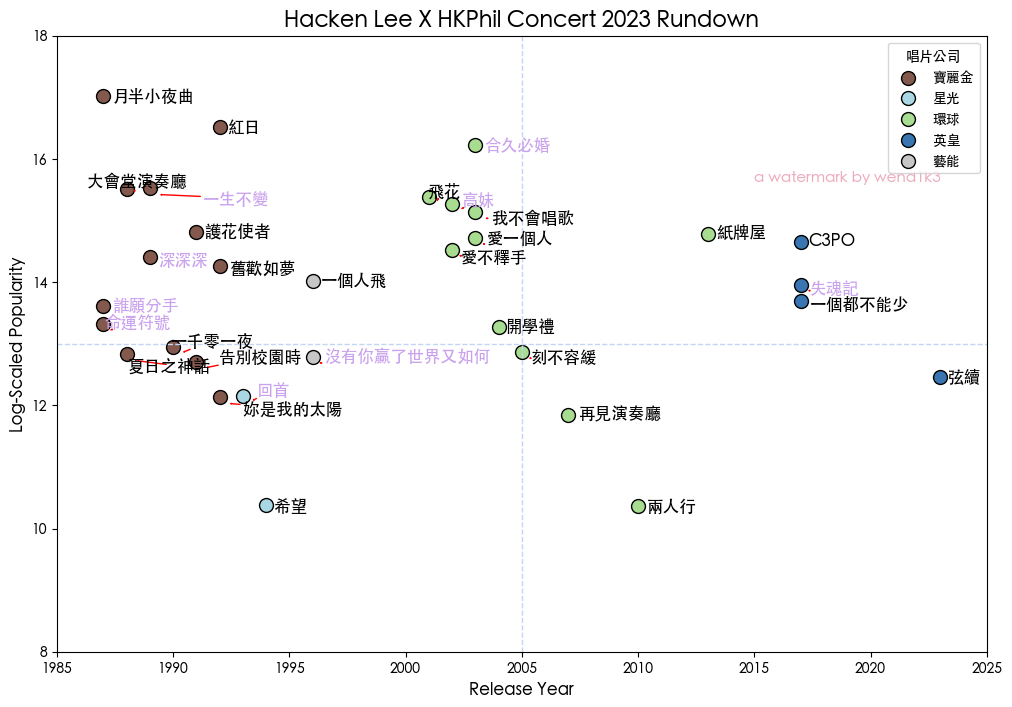

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib
import matplotlib.font_manager as fm

path = "dataset/"
matplotlib.rcParams['font.family'] = ['Heiti TC']

no_duplicate_df = pd.read_excel(path+"23HongKong.xlsx")


no_duplicate_df['log_play_count'] = np.log1p(no_duplicate_df['play_count'])

color_id = {
     '寶麗金': '#84594d',  
    '星光': '#a9d8e4',  
    '藝能': '#c6c6c6',  # Green
    '環球': '#a7dc91',  # Red
    '英皇': '#3975b1'   # Purple
}




no_duplicate_df['color'] = no_duplicate_df['record_company'].map(color_id)
rundown_color_map = {'main': 'black', 'encore': '#c9a1ed'}
no_duplicate_df['text_color'] = no_duplicate_df['rundown'].map(rundown_color_map)

x = no_duplicate_df['release_year']
y = no_duplicate_df['log_play_count']


x_min, x_max = 1985, 2025
y_min, y_max = 8,18
x_mid = x_min + (x_max - x_min) / 2
y_mid = y_min + (y_max - y_min) / 2


fig, ax = plt.subplots(figsize=(12, 8))

for company, group in no_duplicate_df.groupby('record_company'):
    ax.scatter(
        group['release_year'],
        group['log_play_count'],
        label=company,
        color=group['color'].iloc[0],
        edgecolor='black',
        s=100
        
    )

texts = []
for i, row in no_duplicate_df.iterrows():
    texts.append(
        ax.text(
            row['release_year']+0.3,
            row['log_play_count']-0.1,
            row['track_name'],
            fontsize=12,
            ha='left',
            color=row['text_color']
        )
    )
adjust_text(texts,arrowprops=dict(arrowstyle='->', color='red'))


ax.axvline(x=x_mid, color='#c2d6f3', linestyle='--', linewidth=1)
ax.axhline(y=y_mid, color='#c2d6f3', linestyle='--', linewidth=1)
ax.set_xlim(1985,2025)
ax.set_ylim(8,18)

ax.set_title('Hacken Lee X HKPhil Concert 2023 Rundown', fontsize=16)
ax.set_xlabel('Release Year', fontsize=12)
ax.set_ylabel('Log-Scaled Popularity', fontsize=12)
ax.legend(title="唱片公司", loc='upper right')
plt.text(0.85,
         0.77,
         "a watermark by wend1k3",
         transform=plt.gca().transAxes,
            ha='center',  
            va='center',  
            alpha=1,
                fontdict=dict(
                    fontsize=11,
                    color='#ecacbd',
                    family=
                    "Heiti TC",  
                    weight=
                    'normal', 
                )  )
plt.show()


The above example code will yield a four-quadrant visualization where x-axis represents the track's release year and y-axis represents the popularity of the track. 
![](img/23HKquadrant.png)

### 4.2 Bar plot 

## 5. Discussion